## 2. Métricas de avaliação
Como podemos mensurar a qualidade do modelo? Ou, se treinarmos vários modelos diferentes, como determinar qual é o melhor?

Para responder a estas perguntas, utilizamos as **métricas de avaliação** de modelos de classificação.

Em um problema de classificação binária podemos ter as seguintes denominações:
<br>
* TP representa a quantidade de True Positive (Verdadeiro Positivo): classes 1 que foram previstas como 1
* TN representa a quantidade de True Negative (Verdadeiro Negativo): classes 0 que foram previstas como 0
* FP representa a quantidade de False Positive (Falso Positivo): classes 0 que foram previstas como 1
* FN representa a quantidade de False Negative (Falso Negativo): classes 1 que foram previstas como 0

<img src="images/compare.png" />

Existem diversas formas de realizar tais avaliações, cada uma observando o problema de um ponto de vista diferente.


### 2.1 Acurácia
*No geral, com que frequência o classificador acerta?* <br> <br>
Também conhecida como **taxa de acerto**, essa medida de desempenho traz a proporção de acertos sobre o total de observações:

$$
\frac{VP + VN}{VP + VN + FP + FN}
$$ 


A taxa de acerto é um número *limitado entre 0 e 1*. Quanto *maior for o seu valor, mais acurado é o modelo M*.

**Problema da acurácia (Null acurracy)** <br>
Esse problema ocorre quando temos classes desbalanceadas. <br>

Exemplo: Suponha um problema de classificação binária no qual 130 amostras são da classe 0 e 62 são da classe 1, ou seja, 67.7% dos nossos dados pertencem à classe 0.  <br> 
Isso significa que um modelo dumb que sempre desse 0 como resposta, estaria certo em 68% dos casos. <br>
É importante sabermos esse valor para utilizar como baseline dos nossos modelos.


### 2.2 Matriz de Confusão
Uma alternativa para visualizar o desempenho de um modelo é analisar sua matriz de confusão, que ilustra o número de predições corretas e incorretas para cada classe do modelo.

* As linhas dessa matriz representam as classes verdadeiras;

* As colunas representam as classes preditas pelo modelo.

Logo, cada elemento $ m_{ij} $ de uma matriz de confusão M apresenta o número de exemplos da classe **i** classificados como classe **j**.

Dessa forma, os elementos na **diagonal principal** indicam as classificações feitas de forma **correta**, enquanto os **outros elementos** são os classificados de forma **incorreta**.

<img src="images/matriz_confusao_explicada.svg"  style="width:600px" />

Por meio dela, temos as medidas quantitativas de quais classes possuem maior dificuldade de serem corretamente classificadas, se existe alguma "confusão" recorrente entre duas classes e mais uma série de medidas quantitativas sobre o modelo, como veremos a seguir.

Acurácia do modelo: 68.5%


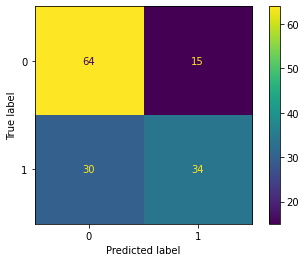

In [85]:
# Importar accuracy_score e plot_confusion_matrix do sklearn.metrics 
from sklearn.metrics import accuracy_score, plot_confusion_matrix

# Calcular a acurácia utilizando o accuracy_score
ac = accuracy_score(y_test, y_pred)

print(f"Acurácia do modelo: {ac:.1%}")

plot_confusion_matrix(clf, X_test, y_test);

<img src="images/metricas_classificacao.svg"  style="width:600px" />

### 2.3 Precision
*When a positive value is predicted, how often is the prediction correct? How "precise" is the classifier when predicting positive instances?*

> Definição: Precisão mede quantas amostras preditas como positivas eram de fato positivas
     
$$ Precision = \frac{TP}{TP+FP}  $$

O Precision varia entre 0 e 1.

Quando utilizar:
- você precisa restringir o número de FP
- não há preocupação com os FN (já que eles são ignorados)
- você quer ter certeza de que quando o modelo prediz um positivo ele de fato é positivo

Exemplo: <br>
- Uma indústria farmaceutica criou um novo teste de gravidez e quer que seu teste identifique corretamente quando a pessoa está grávida. Não há tanta preocupação com os FN pois em algum outro momento a gravidez será descoberta.

### 2.4 Recall / Sensitividade / True Positive Rate (TPR) <br>
*Quão sensível é o classificador em prever instâncias positivas?* <br>
*Dos valores preditos como positivos, quantos estavam de fato corretos?* <br>

> Definição: De todos os casos positivos, quantos conseguimos identificar?

 O Recall varia entre 0 e 1.

$$ Recall = \frac{TP}{TP+FN} $$

Quando utilizar: 
- você precisa restringir o número de FN
- não há preocupação com os FP (já que eles são ignorados na fórmula)
- você quer obter o maior número de valores positivos

Exemplo:
- Uma empresa farmaceutica que produz teste de detecção de câncer decide por usar o Recall a fim de reduzir os FN o máximo possível.


### 2.5 Matriz de Confusão não binária
<img src="images/matriz_3x3.svg"  style="width:600px" />


## Qual métrica devo escolher?

    Choice of metric depends on your business objective
        Identify if FP or FN is more important to reduce
        Choose metric with relevant variable (FP or FN in the equation)
    Spam filter (positive class is "spam"):
        Optimize for precision or specificity
            precision
                false positive as variable
            specificity
                false positive as variable
        Because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
    Fraudulent transaction detector (positive class is "fraud"):
        Optimize for sensitivity
            FN as a variable
        Because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)


## Precision-Recall Tradeoff
Em geral, maximizar a precisão gera uma redução no valor de recall e vice-versa. Como resolver

### F1 - Score
É uma média harmônica entre Precision e Recall que penaliza quando um dos dois (ou ambos) é muito baixo (devido à multiplicação desses scores no numerador). O F1 varia entre 0 e 1.

$$F1 = \frac{2* Recall * Precision}{Recall + Precision}$$



print(metrics.recall_score(y_test, y_pred_class))

### Especificidade / True Negative Rate (TNR)
*Quão sensível é o classificador em prever instâncias negativas?* <br>
*Dos valores preditos como negativos, quantos estavam de fato corretos?* <br>
$$specificity = \frac{TN}{TN + FP} = 1-FPR$$


## 2.4. Curva ROC
Uma forma alternativa e comum de avaliar classificadores em problemas binários é por meio do uso das curvas ROC (Receiving Operating Characteristics).

Seu gráfico é bidimensional: <br>
        * eixo y -  True Positive Rate (TPR) = Recall <br>
        * eixo x -  False Positive Rate (FPR) = (1 - Specificity) <br>

Para um modelo genérico a curva ROC é parecida com a da figura a seguir:

<img src="images/ROCAUC.png"  style="width: 500px" />

Em resumo, a curva representa a relação entre a TPR e a FPR e quanto maior a **área abaixo da curva (AUC - Area Under Curve)** melhor é o modelo.
<br>
Para plotar essa curva nós precisamos setar diferentes valores de threshold que definem a qual classe pertence cada amostra e calcular qual o valor de TPR e FPR para esse threshold. Considere um problema de duas classes cada um com 100 amostras cujo gráfico de probabilidades se encontra abaixo. Selecionamos 7 thresholds distintos que irão definir à qual classe percence aquela amostra cujos valores estão exemplificados nas figuras.

<img src="images/prob example.png"  style="width: 1000px" />


| Threshold |                     Descrição                      | TPR = tp/tp+fn  | FPR = 1 - tn/fp+tn | 
|-----------|----------------------------------------------------|-----------------|-------------------|
|     0     | Todas as amostras são classificadas como Positivas | 100/(100+0) = 1 | 1 - 0/(100+0) = 1 |
|    100    | Todas as amostras são classificadas como Negativas | 0/(0+100) = 0   | 1 - 100/(0+100) = 0 |

Idealmente queremos reduzir a quantidade de amostras classificadas incorretamente (FP e FN) e ao mesmo tempo tentar deixar a curva o mais próximo de TPR=1 e FPR=0 até que todas as amostras TP tenham sido classificadas. Dependendo da curva obtida com o modelo podemos classificá-lo de acordo com sua performance.

<img src="images/ROCAUC2.png"  style="width: 500px" />

Se um modelo se encontra na diagonal, dizemos que ele possui comportamento similar ao lançamento de uma moeda não viciada e temos um modelo aleatório.

*Modelos abaixo dessa linha são piores que o aleatório, enquanto que acima são modelos melhores que o aleatório.*

* Se um modelo está na **ponta superior esquerda** (chamada de céu ROC), dizemos que é um **modelo perfeito**;
* Se está na **ponta superior direita ou inferior esqueda**, o modelo sempre classificará novos itens como positivos ou negativos, respectivamente;
* Se está na **ponta inferior direita** (chamada de inferno ROC), esse modelo estará **sempre errando**.


<img src="images/1341805045.jpg" text="Fonte: www.datasciencecentral.com/roc-curve-explained-in-one-picture"/>

<br>

### Comparando modelos distintos
Com essa métrica também conseguimos comparar modelos distintos sendo o melhor deles aquele que se aproxima de TPR=1:

<img src="images/compare_models.png"  style="width: 500px" />

*Quando não há interseções entre as curvas de dois modelos, significa que o modelo que possui sua curva mais próxima do céu ROC é o que oferece melhor desempenho.*

Ao existir cruzamentos, cada um terá um desempenho melhor que o outro de acordo com a região.

## AUC-ROC (Area Under the ROC Curve)

Entretanto, o mais comum é a determinação da **área abaixo da curva ROC (AUC-ROC)** para cada modelo e compará-los com essa medida única, que é compreendida entre 0 e 1:

* Valores próximos de 1 são considerados os melhores;
* Valores próximos a 0,5 são considerados aleatórios.
<br>
A AUC-ROC trás duas grandes vantagens:

* Mede a qualidade da predição do modelo independente do threshold;
* Robustez contra o desbalanceamento.

Modelos com maior AUC conseguem discriminar melhor entre as classes.

ROC AUC also tends to be dominated by the "high FPR" points. Depending on the application, these points may be the least relevant. Consider the case where the model is used to refer high-risk transactions to experts who will conduct further vetting. There may only be enough humans to assess 50 transactions per unit time; since the most highly-ranked transactions occur on the "left hand" size of the ROC curve by definition, this is also the region with the lowest area. So by looking at the whole AUC, you're optimistically biasing your results upwards, i.e. ROC AUC is buoyed by the observations "to the right" of the actual set of observations which humans will vet. (Illustration is simple. Draw a vertical line at FPR<0.5 on any ROC curve. The area to left is higher for all such vertical lines.) To avoid this, some people use partial ROC AUC, which has its own host of problems, chief among them that software implementations tend to assume that you're interested in truncation at some value of FPR. But in the case that you care about the top n transactions, this approach is obviously wrong because the top n transactions will happen at different FPR values for different classifiers. Standardization of partial AUC (to preserve the property that AUC < 0.5 is worse than random, 1 is perfect, 0 is worthless) incurs further difficulties.

A AUC deve ser utilizada em classificações binárias. Para multi-classes podemos usar o one-to-rest AUC.
<br>




## Bibliografia:
- [ROC-AUC](https://github.com/tunanottechnical/Jupyter-Workings/blob/master/Machine%20Learning%20in%20Mineral%20Exploration%20-%20Understanding%20Classification%20Evaluation%20Metrics.ipynb) <br>
- [Métricas](https://www.kaggle.com/code/reighns/tutorial-on-machine-learning-metrics/notebook) <br>
- [Google Crash Course](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall) <br>
 <br>


## Material de Aprofundamento
- [PR-Curve](https://www.kaggle.com/code/reighns/tutorial-on-machine-learning-metrics/notebook) <br>
- [Adjusting the classification threshold](https://www.ritchieng.com/machine-learning-evaluate-classification-model/) <br>
- [Gini](https://yassineelkhal.medium.com/confusion-matrix-auc-and-roc-curve-and-gini-clearly-explained-221788618eb2)
- [Métricas](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)